## Importing Libraries

In [37]:
import pandas as pd
from scipy import stats
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import seaborn as sns

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



## Reading Data

In [13]:
X_train = pd.read_csv(r"C:/Users/hardi/Desktop/GST/Train_60/X_Train_Data_Input.csv")
y_train = pd.read_csv(r"C:/Users/hardi/Desktop/GST/Train_60/Y_Train_Data_Target.csv")

X_test = pd.read_csv(r"C:/Users/hardi/Desktop/GST/Test_20/X_Test_Data_Input.csv")
y_test = pd.read_csv(r"C:/Users/hardi/Desktop/GST/Test_20/Y_Test_Data_Target.csv")


In [14]:
training = pd.merge(X_train,y_train,on = 'ID',how = 'inner')
test = pd.merge(X_test,y_test,on = 'ID',how = 'inner')

In [15]:
training.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  

[5 rows x 24 columns]

In [16]:
training.drop("ID",axis = 1,inplace = True)
test.drop("ID",axis = 1,inplace = True)

## Percentage of Null Values

In [17]:
(training.isnull().sum()/len(training))*100

Column0      0.001146
Column1      0.000000
Column2      0.000000
Column3     16.086829
Column4     16.266034
Column5     21.293208
Column6      0.490363
Column7      0.000000
Column8      0.490363
Column9     93.250061
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column14    46.578478
Column15     2.095951
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.000000
target       0.000000
dtype: float64

In [18]:
test.head()

Column0  Column1  Column2   Column3   Column4   Column5   Column6  \
0      1.0     1986     53.0  0.678139  0.701403 -0.007469 -0.407939   
1      2.0     1579     12.0  0.678139  0.701403 -0.007468 -0.407939   
2      0.0      898   3817.0 -2.028572 -1.855728       NaN -0.407939   
3      0.0       79   3449.0 -0.675216 -0.577162 -0.007469  0.004020   
4      1.0      646   6510.0 -2.028572 -1.855728       NaN -0.407939   

    Column7   Column8   Column9  ...  Column13  Column14  Column15  Column16  \
0 -0.015607  0.554860 -0.088554  ...         1  0.001351   0.00339       0.0   
1 -0.015607  0.142149       NaN  ...         0  0.001351   0.00339       0.0   
2 -0.015607 -0.774979       NaN  ...         0       NaN   0.00339       0.0   
3 -0.015607  0.635264       NaN  ...         1  0.001351   0.00339       0.0   
4 -0.015434 -0.774979       NaN  ...         1       NaN   0.00339       0.0   

   Column17  Column18  Column19  Column20  Column21  target  
0         0       0.0         0         0         0       0  
1         0       0.0         0         0         0       0  
2         0       0.0         0         0         0       0  
3         0       0.0         0         0         0       0  
4         0       0.0         0         0         0       0  

[5 rows x 23 columns]

## Removal of Column with percentage > 90%

In [19]:
training.drop('Column9', axis=1,inplace = True)
test.drop('Column9', axis=1,inplace = True)

## Missing Value Imputations

## Method 1 (Mean)

In [20]:
a = {
    'Column3':test['Column3'].mean(),
     'Column4':test["Column4"].mean(),
     'Column5':test['Column5'].mean(),
     'Column6':test["Column6"].mean(),
     'Column8':test["Column8"].mean(),
     'Column15':test['Column15'].mean(),
    'Column14':test['Column14'].mean()}

b = {
    'Column3':training['Column3'].mean(),
     'Column4':training["Column4"].mean(),
     'Column5':training['Column5'].mean(),
     'Column6':training["Column6"].mean(),
     'Column8':training["Column8"].mean(),
     'Column15':training['Column15'].mean(),
    'Column14':training['Column14'].mean()}

In [21]:
test.fillna(a,inplace = True)
training.fillna(b,inplace = True)

## Method 2 (Linear Interpolation)

In [30]:
# columns_to_interpolate = ['Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column14', 'Column15']

In [ ]:
# training[columns_to_interpolate] = training[columns_to_interpolate].interpolate(method='linear', axis=0)
# test[columns_to_interpolate] = test[columns_to_interpolate].interpolate(method='linear', axis=0)

In [22]:
training.dropna(subset=['Column0'], inplace=True)
test.dropna(subset=['Column0'], inplace=True)

## Visualisation of Outliers

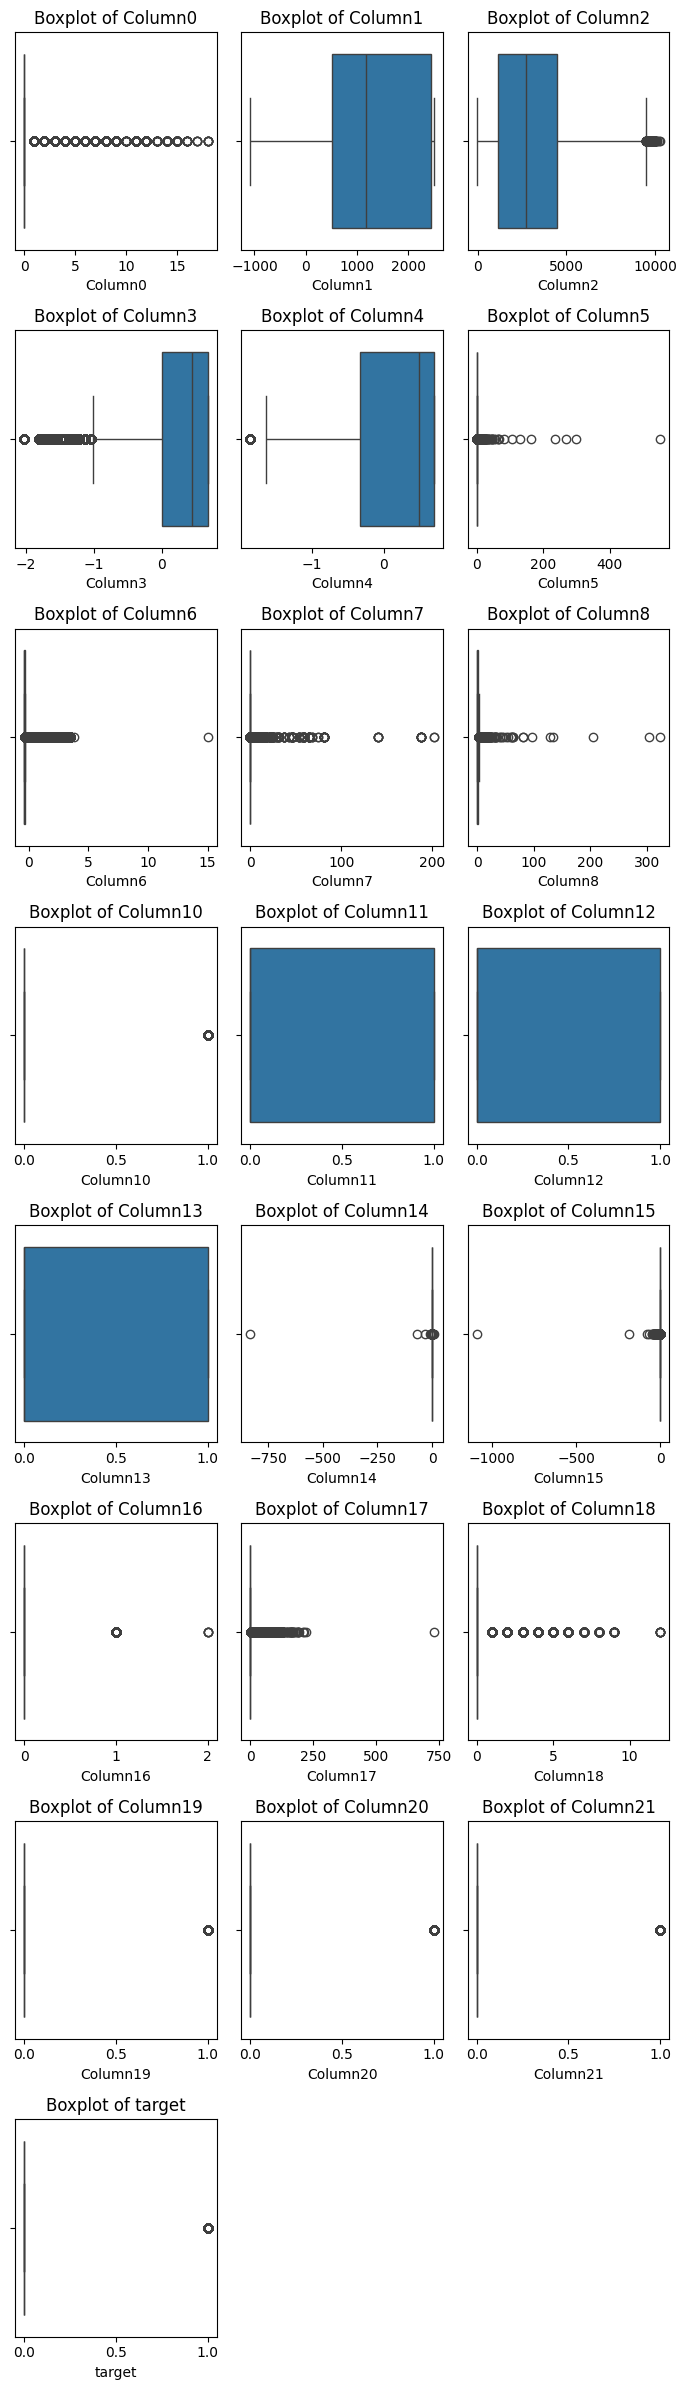

In [25]:
num_cols = training.select_dtypes(include=np.number).columns

num_features = len(num_cols)

rows = int(np.ceil(num_features / 3)) 

fig, axs = plt.subplots(rows, 3, figsize=(7, rows * 3))  
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=training, x=col, ax=axs[i])  
    axs[i].set_title(f'Boxplot of {col}')  

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.show()

## Removing Outliers


In [26]:
numeric_columns = training.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('target')
z_scores = np.abs(stats.zscore(training[numeric_columns]))
threshold = 3

outliers = (z_scores < threshold).all(axis=1)

training_df_cleaned = training[outliers]

In [27]:
print(f"Original data size: {training.shape}")
print(f"Data size after removing outliers: {training_df_cleaned.shape}")

Original data size: (785124, 22)
Data size after removing outliers: (689551, 22)


In [28]:
X =training_df_cleaned.drop(columns=['target'])
y =training_df_cleaned['target']

## Upsampling using SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
print("After SMOTE oversampling:")
print(y_resampled.value_counts())

After SMOTE oversampling:
target
0    636653
1    636653
Name: count, dtype: int64


In [31]:
X_test = test.drop(columns = ['target'])
y_test = test['target']

## Training and Testing

In [32]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [33]:
xgb_model.fit(X_resampled, y_resampled)

c:\Users\hardi\Desktop\GST\gst\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Plotting feature importance

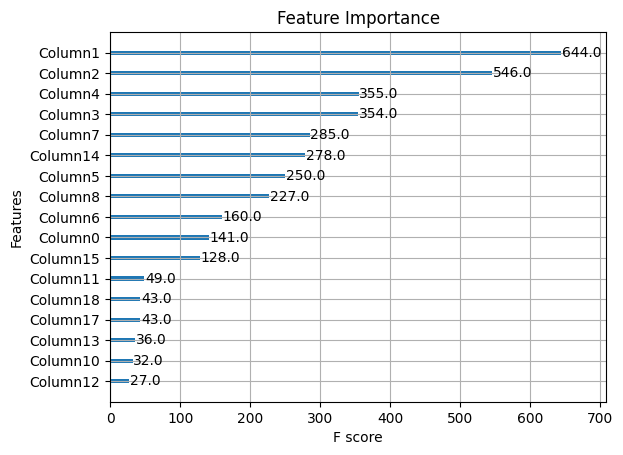

In [34]:
xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()

## Evaluating on Test Set

In [35]:
y_test_pred = xgb_model.predict(X_test)

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

print("\nTest Classification Report:")
print(test_class_report)

print(f"Test AUC-ROC Score: {test_auc_roc}")


Test Confusion Matrix:
[[230854   6178]
 [   676  24002]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237032
           1       0.80      0.97      0.88     24678

    accuracy                           0.97    261710
   macro avg       0.90      0.97      0.93    261710
weighted avg       0.98      0.97      0.97    261710

Test AUC-ROC Score: 0.9928476363225838


## Constructing Confusion Matrix and ROC Curve


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237032
           1       0.80      0.97      0.88     24678

    accuracy                           0.97    261710
   macro avg       0.90      0.97      0.93    261710
weighted avg       0.98      0.97      0.97    261710


Test Confusion Matrix:
[[230854   6178]
 [   676  24002]]


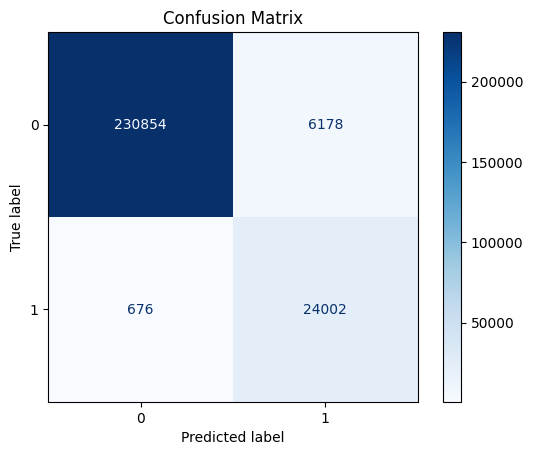

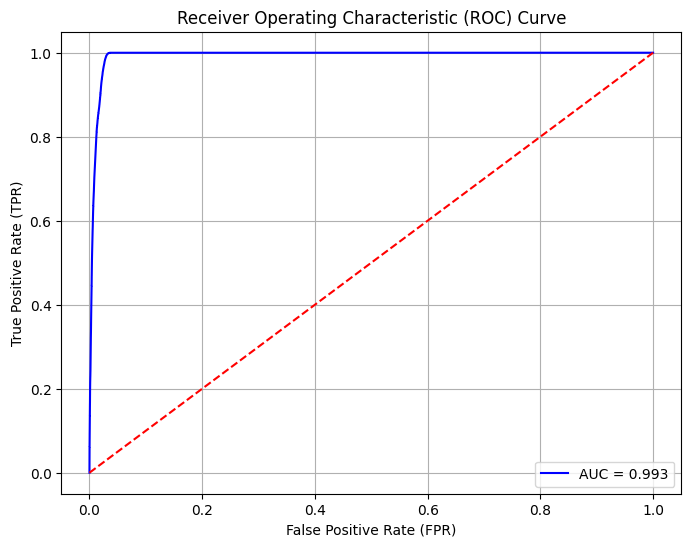

In [36]:

y_test_pred = xgb_model.predict(X_test)
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]  

test_conf_matrix = confusion_matrix(y_test, y_test_pred)

test_auc_roc = roc_auc_score(y_test, y_test_proba)

test_class_report = classification_report(y_test, y_test_pred)
print("\nTest Classification Report:")
print(test_class_report)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {test_auc_roc:.3f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random predictions
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [38]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Test Accuracy: ",test_accuracy)
print("Test F1 score: ",test_f1)
print("Test Precision: ",test_precision)
print("Test Recall: ",test_recall)

Test Accuracy:  0.9738107065072026
Test F1 score:  0.8750592438659812
Test Precision:  0.7952948972829689
Test Recall:  0.9726071804846422
